# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом.



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [2]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()

,0
children,0
days_employed,2174
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

,days_employed
income_type,
безработный,366413.652744
в декрете,3296.759962
госслужащий,2689.368353
компаньон,1547.382223
пенсионер,365213.306266
предприниматель,520.848083
сотрудник,1574.202821
студент,578.751554


У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

,0
children,0
days_employed,0
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

np.int64(71)

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Выведем еще раз таблицу со всеми изменениями

In [28]:
data.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,среднее,1,женат / замужем,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,высшее,0,гражданский брак,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

Создадим отдельный датафрейм со столбцами: процент просрочек (```percent_delays```), количество должников (```debters```) и количество заемщиков (```borrowers```) и сгруппируем данные по количеству детей

In [26]:
children_debt = data.groupby('children')['debt'].agg(['mean', 'sum', 'count'])
children_debt.columns = ['percent_delays', 'debters', 'borrowers']
#перевод в проценты
children_debt['percent_delays'] = children_debt['percent_delays'] * 100

#сортировка по убыванию по проценту просрочки
children_debt.sort_values(by='percent_delays', ascending=False)

,percent_delays,debters,borrowers
children,,,
4,9.756098,4,41
2,9.454191,194,2052
1,9.234609,444,4808
3,8.181818,27,330
0,7.543822,1063,14091
5,0.000000,0,9


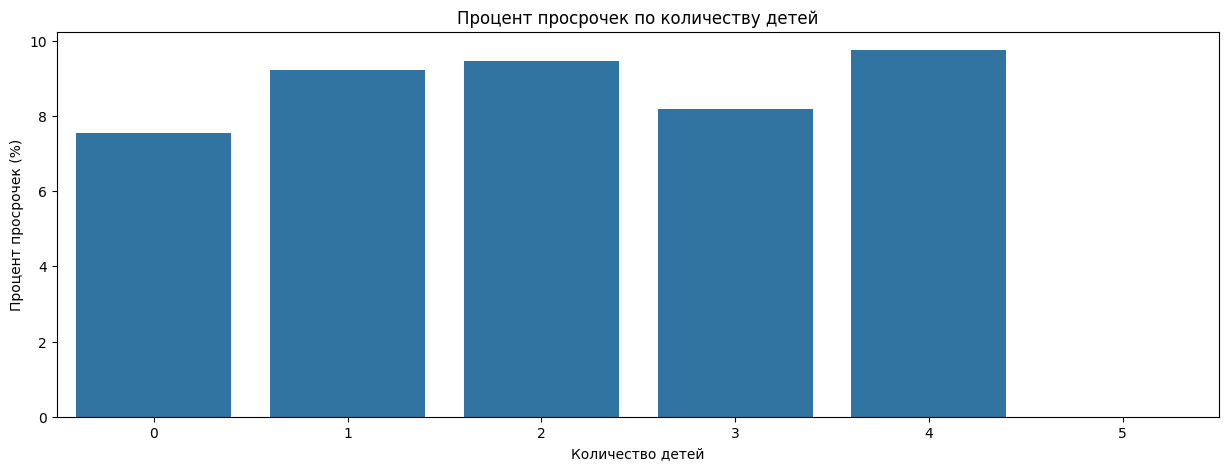

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(x=children_debt.index, y=children_debt['percent_delays'])
plt.title('Процент просрочек по количеству детей')
plt.xlabel('Количество детей')
plt.ylabel('Процент просрочек (%)')
plt.show()

**Вывод:** Да, зависимость между количеством детей и возвратом кредита в срок есть. Из таблицы видно, что чем больше детей, тем выше процент просрочек.

Соответственно, кредит стоит выдавать в первую очередь семьям без детей, там процент просрочек 7%, а в остальных семьях с детьми процент составляет больше 9%.

Из-за того, что количество должников распределено неравномерно, начиная от семей, где количество детей больше 2, можно сделать ошибочные выводы.
Как видно из таблицы, семьи, где детей 3, количество должников всего 27, где детей 4 - всего 4 должника, а где детей 5 - должников нет вообще.

Из этого можно сделать вывод, что стоит рассмотреть дополнительные параметры при выдаче кредита таким семьям.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

Создадим отдельный датафрейм со столбцами: процент просрочек (```percent_delays```), количество должников (```debters```) и количество заемщиков (```borrowers```)  и сгруппируем данные по семейному положению.

In [27]:
family_debt = data.groupby('family_status')['debt'].agg(['mean', 'sum', 'count'])
family_debt.columns = ['percent_delays', 'debters', 'borrowers']
#перевод в проценты
family_debt['percent_delays'] = family_debt['percent_delays'] * 100

#сортировка по убыванию по проценту просрочки
family_debt.sort_values(by='percent_delays', ascending=False)

,percent_delays,debters,borrowers
family_status,,,
Не женат / не замужем,9.763948,273,2796
гражданский брак,9.313014,385,4134
женат / замужем,7.560558,927,12261
в разводе,7.064760,84,1189
вдовец / вдова,6.624606,63,951


Визуализируем полученные данные

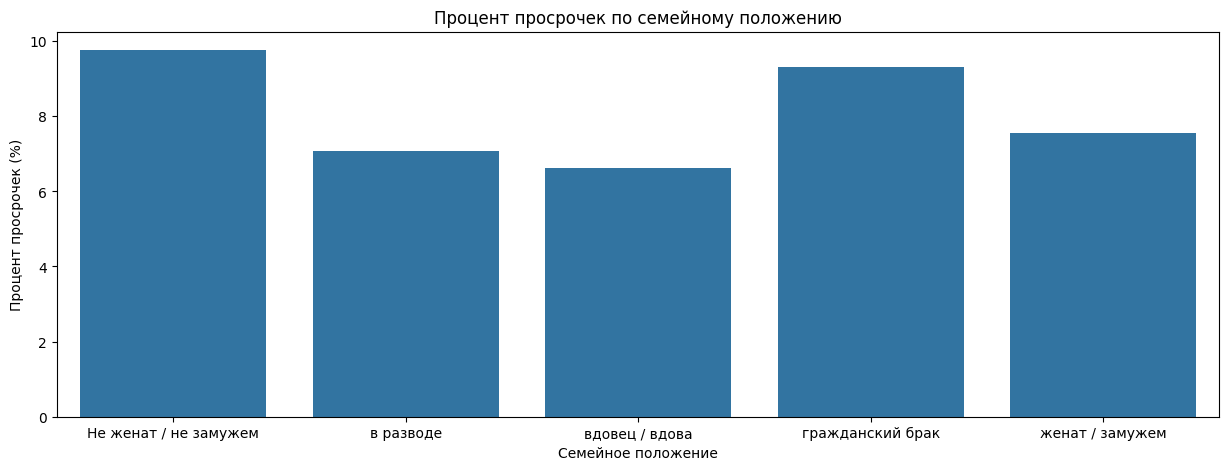

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(x=family_debt.index, y=family_debt['percent_delays'])
plt.title('Процент просрочек по семейному положению')
plt.xlabel('Семейное положение')
plt.ylabel('Процент просрочек (%)')
plt.show()

**Вывод:** Из данной таблицы сложно получить какие-либо результаты:

- Не понятно, чем отличаются категории ```"женат/замужем"``` и ```"гражданский брак"```. На что ориентироваться при выдаче кредита?
Но не смотря на это, из таблицы видно, что категория ```"женат/замужем"``` самая большая, а значит отражает наиболее правдивую информацию. И процент просрочки там довольно низкий.

- Категория ```"Не женат/не замужем"``` не отражает настоящей текущей ситуации, поскольку выборка таких людей небольшая. Следует ориентироваться на другие параметры.

- Такая же ситуация обстоит с категориями ```"в разводе"``` и ```"вдовец/вдова"```, выборка должников еще меньше. Необходимо ориентироваться на какие-то дополнительные параметры при выдаче кредита.

Соответственно, можно сделать вывод, что зависимости между семейным положением и возвратом кредита в срок в данном датафрейме нет.


#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Создадим отдельный датафрейм со столбцами: процент просрочек (```percent_delays```), количество должников (```debters```) и количество заемщиков (```borrowers```) и сгруппируем данные по уровню дохода.

Стоит еще раз вспомнить, как мы группировали уровень дохода и назначали буквенные категории.

- 0–30000 — ```'E'```;
- 30001–50000 — ```'D'```;
- 50001–200000 — ```'C'```;
- 200001–1000000 — ```'B'```;
- 1000001 и выше — ```'A'```.

In [29]:
income_debt = data.groupby('total_income_category')['debt'].agg(['mean', 'sum', 'count'])
income_debt.columns = ['percent_delays', 'debters', 'borrowers']
#перевод в проценты
income_debt['percent_delays'] = income_debt['percent_delays'] * 100

#сортировка по убыванию по проценту просрочки
income_debt.sort_values(by='percent_delays', ascending=False)


,percent_delays,debters,borrowers
total_income_category,,,
E,9.090909,2,22
C,8.498210,1353,15921
A,8.000000,2,25
B,7.060231,354,5014
D,6.017192,21,349


Визуализируем полученные данные

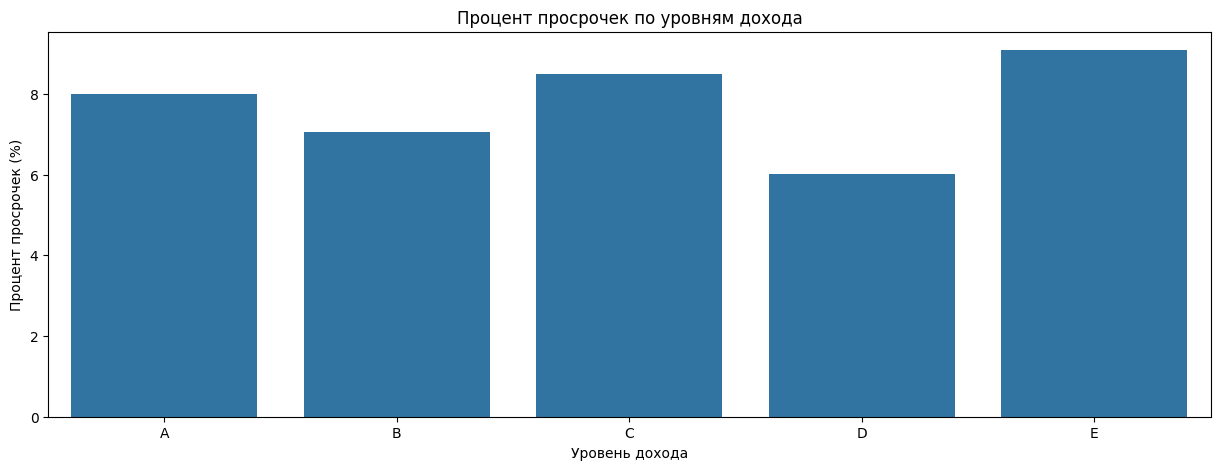

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(x=income_debt.index, y=income_debt['percent_delays'])
plt.title('Процент просрочек по уровням дохода')
plt.xlabel('Уровень дохода')
plt.ylabel('Процент просрочек (%)')
plt.show()

Вывод: Зависимость между уровнем дохода и возвратом кредита в срок есть.
Граждане, которые находятся в категории ```C``` чаще всего являются должниками. Но и общее количество заемщиков почти 15921, значит количество должников вполне оправдано.

Также стоит отметить, что у заемщиков с категории ```E``` самый высокий процент просрочек. Но в любом случае, категории ```A``` и ```E``` оценить нельзя, потому что выборка должников очень маленькая и сделать какой-либо вывод по ним не получится.

Такая же ситуация обстоит с гражданами в категории ```D```, выборка не слишком большая и стоит обратить внимание на другие параметры при выдаче кредита.

Категория ```B``` выглядит довольно достоверно, выборки достаточно, чтобы ее оценить. Можно сделать вывод, что людям с таким уровнем дохода можно выдавать кредит, процент просрочек всего 7%, где количество должников составляет 354 человека из 5014.

Если говорить в общем, чем выше уровень дохода, тем количество должников становится меньше. Для выдачи кредита стоит рассмотреть людей из категорий ```A```, ```B``` и ```C```. Для остальных граждан стоит рассмотреть дополнительные параметры.



#### 3.4 Как разные цели кредита влияют на его возврат в срок?

Создадим отдельный датафрейм со столбцами: процент просрочек ```(percent_delays)```, количество должников ```(debters)``` и количество заемщиков ```(borrowers)``` и сгруппируем данные по целям кредита.

Стоит еще раз вспомнить, какие категории целей кредита находится в нашем датафрейме


- 'операции с автомобилем',
- 'операции с недвижимостью',
- 'проведение свадьбы',
- 'получение образования'.

In [30]:
purpose_debt = data.groupby('purpose_category')['debt'].agg(['mean', 'sum', 'count'])
purpose_debt.columns = ['percent_delays', 'debters', 'borrowers']
#перевод в проценты
purpose_debt['percent_delays'] = purpose_debt['percent_delays'] * 100

#сортировка по убыванию по проценту просрочки
purpose_debt.sort_values(by='percent_delays', ascending=False)


,percent_delays,debters,borrowers
purpose_category,,,
операции с автомобилем,9.347978,400,4279
получение образования,9.252758,369,3988
проведение свадьбы,7.911803,183,2313
операции с недвижимостью,7.255139,780,10751


Визуализируем полученные данные

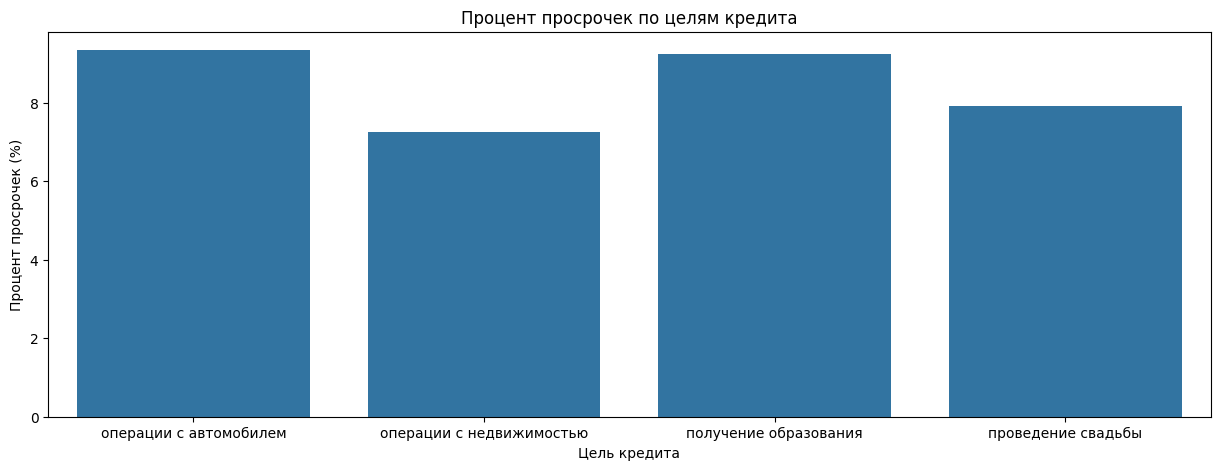

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(x=purpose_debt.index, y=purpose_debt['percent_delays'])
plt.title('Процент просрочек по целям кредита')
plt.xlabel('Цель кредита')
plt.ylabel('Процент просрочек (%)')
plt.show()

**Вывод:** самые высокие проценты просрочек у граждан, которые брали кредит для покупки автомобиля и получения образования.

Стоит отдать предпочтение тем гражданам, которые берут кредит для проведения свадьбы или покупают недвижимость.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:*
1. Человеческий фактор - случайно пропустили какие-то данные или клиент отказался предоставлять информацию
2. Обработка данных - пропуски могли возникнуть при объединении или фильтрации
3. Технические ошибки - ошибки могли возникнуть при сборе или передаче данных

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

Ответ:
Медиана устойчива к выбросам, в отличие от среднего, которое может искажаться экстремальными значениями. А все потому что медиана разделяет набор на 2 равные части, и само ее значение определяется как среднее число из этого набора.

Для количественных переменных вроде дохода или стажа распределение часто скошено, и медиана лучше представляет 'типичное' значение.
Поэтому, даже если в наборе будут выбросы, они не смогут существенно ее поменять.

### Шаг 4: общий вывод.

#### Что было сделано?

Был обработан "сырой" датасет с данными о гражданах, которые хотят взять кредит. Удалены пропуски в данных и дубликаты, устранены некорректные данные.
Также были классифицированы пользователи по определенным признакам (уровень дохода, цель кредита).
После обработки датасета было проведено исследование зависимостей одних параметров от других - "надежность" кредитополучателя от количества детей, уровня дохода и т.д.

#### Какие зависимости были выявлены?

1. При появлении детей (или увеличении их числа) процент невозвратов растет.
2. Корреляция между семейным положением и возвратом кредита отсутсвует.
3. Существует зависимость по уровню дохода - чем больше доход, тем меньше процент просрочек.
4. Такие цели кредита, как покупка автомобиля и получения образования - наиболее рискованные цели для банка.

#### Какие клиенты подходят банку, а каким стоит отказать.

**Характеристики идеального клиента:**

children — количество детей в семье \
days_employed — общий трудовой стаж в днях \
dob_years — возраст клиента в годах \
education — уровень образования клиента \
education_id — идентификатор уровня образования \
family_status — семейное положение \
family_status_id — идентификатор семейного положения \
gender — пол клиента \
income_type — тип занятости \
debt — имел ли задолженность по возврату кредитов \
total_income — ежемесячный доход \
purpose — цель получения кредита

1) Отсутствие детей
2) Отсутствие долгов ранее
3) Ежемесячный доход - от 200000 до 1000000.
4) Цель кредита - покупка недвижимости или проведение свадьбы.

Иные характеристики (трудовой стаж, уровень образования, тип занятости и пол, семейное положение) требуют дополнительного исследования на наличие зависимостей.

**Характеристики нежелательного клиента:**

1) Более двух детей.
2) Семейное положение - любое.
3) Наличие задолженностей в прошлом.
4) Ежемесячный доход ниже 50000.
5) Цель кредита - автомобиль или образование.

Как и в прошлом пункте, нужен более тонкий анализ при принятии решения.

#### Итоговые рекомендации.

Стоит отметить, что исследованные в данном проекте зависимости дают лишь поверхностные знания о клиенте - нужно больше данных, чтобы принять решение. Также неизвестно, какой уровень риска приемлем для банка. Неизвестна сумма кредита, возраст и кредитный рейтинг; нужна более детализированная кредитная история, информация о наличии долгов на данный момент.

Тем не менее, полученных данных хватает, чтобы определить некоторые "красные флаги" и отказать кредитополучателю еще на этапе заявки. Они приведены в предыдущих выводах.